In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from ngboost import NGBRegressor
from ngboost.scores import MLE

In [10]:
# X = pd.read_pickle('../data/pkl/X_1000.pkl')
# y = pd.read_pickle('../data/pkl/y_1000.pkl')

In [17]:
X = pd.read_pickle('../data/pkl/X_basic_rolling_df_5yrs_preprocessed.pkl')
y = pd.read_pickle('../data/pkl/y_basic_rolling_df_5yrs_preprocessed.pkl')
X.shape
len(y)

6558

In [25]:
X.columns

Index(['TEAM_ABBREVIATION_ATL_h', 'TEAM_ABBREVIATION_BKN_h',
       'TEAM_ABBREVIATION_BOS_h', 'TEAM_ABBREVIATION_CHA_h',
       'TEAM_ABBREVIATION_CHI_h', 'TEAM_ABBREVIATION_CLE_h',
       'TEAM_ABBREVIATION_DAL_h', 'TEAM_ABBREVIATION_DEN_h',
       'TEAM_ABBREVIATION_DET_h', 'TEAM_ABBREVIATION_GSW_h',
       'TEAM_ABBREVIATION_HOU_h', 'TEAM_ABBREVIATION_IND_h',
       'TEAM_ABBREVIATION_LAC_h', 'TEAM_ABBREVIATION_LAL_h',
       'TEAM_ABBREVIATION_MEM_h', 'TEAM_ABBREVIATION_MIA_h',
       'TEAM_ABBREVIATION_MIL_h', 'TEAM_ABBREVIATION_MIN_h',
       'TEAM_ABBREVIATION_NOP_h', 'TEAM_ABBREVIATION_NYK_h',
       'TEAM_ABBREVIATION_OKC_h', 'TEAM_ABBREVIATION_ORL_h',
       'TEAM_ABBREVIATION_PHI_h', 'TEAM_ABBREVIATION_PHX_h',
       'TEAM_ABBREVIATION_POR_h', 'TEAM_ABBREVIATION_SAC_h',
       'TEAM_ABBREVIATION_SAS_h', 'TEAM_ABBREVIATION_TOR_h',
       'TEAM_ABBREVIATION_UTA_h', 'TEAM_ABBREVIATION_WAS_h',
       'FG_PCT_rolling_h', 'FG3_PCT_rolling_h', 'FT_PCT_rolling_h',
       'OREB_roll

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Instantiate an NGBoost model with a Gaussian process as the probabilistic model
ngb = NGBRegressor()

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
scores = cross_val_score(ngb, X, y, cv=10)

ngb_score = scores.mean()

ngb_score

[iter 0] loss=4.1023 val_loss=0.0000 scale=1.0000 norm=11.6736
[iter 100] loss=4.0260 val_loss=0.0000 scale=1.0000 norm=10.8337
[iter 200] loss=3.9825 val_loss=0.0000 scale=1.0000 norm=10.4368
[iter 300] loss=3.9510 val_loss=0.0000 scale=1.0000 norm=10.1723
[iter 400] loss=3.9262 val_loss=0.0000 scale=1.0000 norm=9.9744
[iter 0] loss=4.0913 val_loss=0.0000 scale=1.0000 norm=11.5517
[iter 100] loss=4.0134 val_loss=0.0000 scale=1.0000 norm=10.7334
[iter 200] loss=3.9715 val_loss=0.0000 scale=1.0000 norm=10.3421
[iter 300] loss=3.9399 val_loss=0.0000 scale=1.0000 norm=10.0763
[iter 400] loss=3.9169 val_loss=0.0000 scale=1.0000 norm=9.8803
[iter 0] loss=4.0883 val_loss=0.0000 scale=1.0000 norm=11.5216


KeyboardInterrupt: 

In [7]:
# Fit the model to the training data
ngb.fit(X_train, y_train)

[iter 0] loss=4.0927 val_loss=0.0000 scale=1.0000 norm=11.5720
[iter 100] loss=4.0153 val_loss=0.0000 scale=1.0000 norm=10.7708
[iter 200] loss=3.9736 val_loss=0.0000 scale=1.0000 norm=10.3654
[iter 300] loss=3.9402 val_loss=0.0000 scale=1.0000 norm=10.0928
[iter 400] loss=3.9152 val_loss=0.0000 scale=1.0000 norm=9.8925


NGBRegressor(random_state=RandomState(MT19937) at 0x108C2BE40)

In [8]:
# Make predictions on the testing data
y_pred = ngb.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.2f}")

# # Get uncertainty estimates for the predictions
y_dist = ngb.pred_dist(X_test)


# # Print the mean and standard deviation of the uncertainty estimates
# print(f"Mean standard deviation: {std_dev.mean():.2f}")

Mean squared error: 169.38


In [9]:
y_test.mean()

2.528048780487805

In [37]:
feature_importance_loc = ngb.feature_importances_[0]

In [38]:
feature_importance_scale = ngb.feature_importances_[1]

In [41]:
loc_feature_dict = dict(zip(X.columns, feature_importance_loc ))

In [46]:
scale_feature_dict = dict(zip(X.columns, feature_importance_scale))

In [45]:
dict(sorted(loc_feature_dict.items(), key=lambda item: item[1], reverse=True))

{'FG_PCT_rolling_h': 0.11391106122160698,
 'FG_PCT_rolling_a': 0.11227961821455913,
 'REB_rolling_h': 0.09552685976844132,
 'DREB_rolling_a': 0.093689020761687,
 'FG3_PCT_rolling_h': 0.07707354791276157,
 'TOV_rolling_a': 0.0702726930678369,
 'TOV_rolling_h': 0.05757631174732492,
 'FG3_PCT_rolling_a': 0.056892493197112835,
 'DREB_rolling_h': 0.055723321861222384,
 'STL_rolling_h': 0.048453064142738374,
 'STL_rolling_a': 0.036083952904733506,
 'REB_rolling_a': 0.028109986818006517,
 'FT_PCT_rolling_a': 0.024178777025904524,
 'AST_rolling_a': 0.02076015383527944,
 'FT_PCT_rolling_h': 0.01960327188596753,
 'PF_rolling_h': 0.016739511982482844,
 'AST_rolling_h': 0.014721904063117673,
 'BLK_rolling_h': 0.009965247963072646,
 'BLK_rolling_a': 0.009144313408309053,
 'TEAM_ABBREVIATION_HOU_h': 0.008059631428782727,
 'OREB_rolling_h': 0.005821519402569732,
 'PF_rolling_a': 0.004154856107156594,
 'TEAM_ABBREVIATION_UTA_h': 0.003006047969326126,
 'TEAM_ABBREVIATION_CHI_h': 0.002984092955758459,
 

In [47]:
dict(sorted(scale_feature_dict.items(), key=lambda item: item[1], reverse=True))

{'BLK_rolling_a': 0.0958964789214812,
 'FT_PCT_rolling_h': 0.09252252928654726,
 'OREB_rolling_a': 0.060570963554170694,
 'REB_rolling_h': 0.05867814750836528,
 'FG3_PCT_rolling_h': 0.05223094782123217,
 'STL_rolling_a': 0.05220586047121887,
 'FG3_PCT_rolling_a': 0.05142302157766366,
 'PF_rolling_h': 0.04188754059284979,
 'OREB_rolling_h': 0.04036467485630542,
 'STL_rolling_h': 0.040051626691655726,
 'DREB_rolling_h': 0.039590712044353674,
 'FT_PCT_rolling_a': 0.034428069998425036,
 'DREB_rolling_a': 0.0301134359179628,
 'AST_rolling_h': 0.02962066414667911,
 'TOV_rolling_a': 0.028118902275954927,
 'TOV_rolling_h': 0.02776615704817869,
 'FG_PCT_rolling_a': 0.027352593024270212,
 'BLK_rolling_h': 0.026282587844761486,
 'PF_rolling_a': 0.01792218860506461,
 'TEAM_ABBREVIATION_MIA_a': 0.01743151132462761,
 'REB_rolling_a': 0.01692746435353206,
 'FG_PCT_rolling_h': 0.012834078782726696,
 'TEAM_ABBREVIATION_LAC_h': 0.010071044525096952,
 'AST_rolling_a': 0.009522132871632118,
 'TEAM_ABBREVI

In [48]:
df_loc = pd.DataFrame({'feature':X.columns,
                       'importance':feature_importance_loc})\
    .sort_values('importance',ascending=False)
df_scale = pd.DataFrame({'feature':X.columns,
                       'importance':feature_importance_scale})\
    .sort_values('importance',ascending=False)

Text(0.5, 1.0, 'scale param')

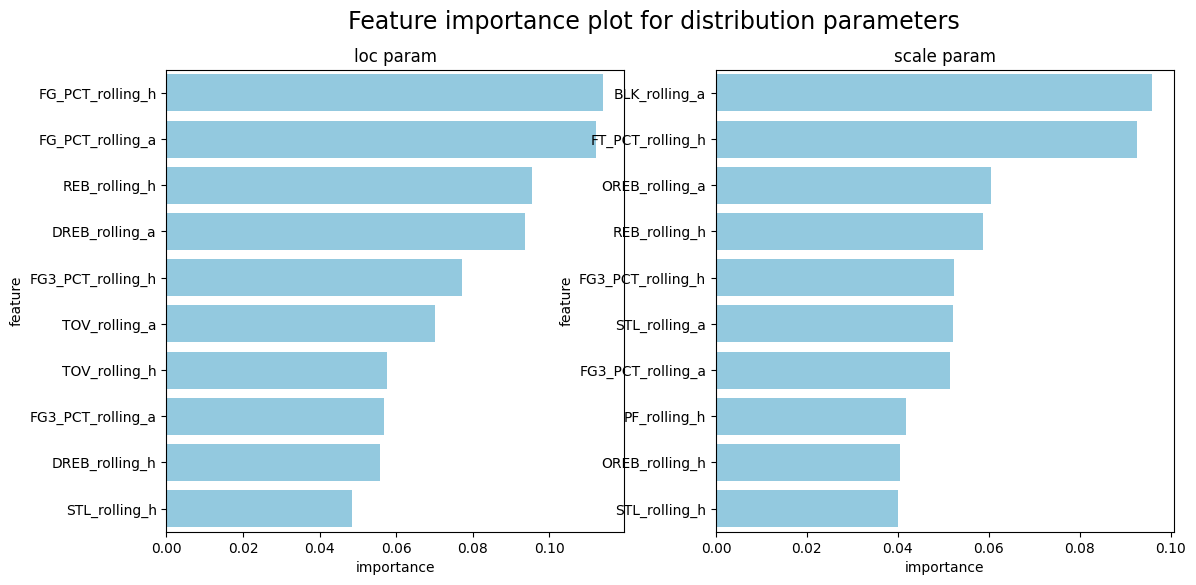

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,6))
fig.suptitle("Feature importance plot for distribution parameters", fontsize=17)
sns.barplot(x='importance',y='feature',ax=ax1,data=df_loc.head(10), color="skyblue").set_title('loc param')
sns.barplot(x='importance',y='feature',ax=ax2,data=df_scale.head(10), color="skyblue").set_title('scale param')

In [52]:
!pip install shap

  Using cached shap-0.41.0-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (572 kB)
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
  Using cached cloudpickle-2.2.1-py3-none-any.whl (25 kB)
  Using cached numba-0.56.4-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.5 MB)
  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Using cached llvmlite-0.39.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2


In [57]:
!pip install scipy
!pip install numba

## Tuning the NGB

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [79]:
from scipy.stats import randint

In [80]:
ngb_cv = NGBRegressor(n_estimators=500, random_state=123)

In [81]:
b1 = DecisionTreeRegressor(criterion='friedman_mse', max_depth=2)
b2 = DecisionTreeRegressor(criterion='friedman_mse', max_depth=4)
b3 = DecisionTreeRegressor(criterion='poisson', max_depth=2)
b4 = DecisionTreeRegressor(criterion='poisson', max_depth=4)

In [82]:
param_grid = {
    'minibatch_frac': [0.3, 0.5, 1.0],
    'Base': [b1, b2, b3, b4],
    'natural_gradient': [True, False],
    'learning_rate': [0.1, 0.01, 0.005, 0.001],
    'tol': [0.0001, 0.0005, 0.001]}

In [84]:
grid_search = GridSearchCV(ngb_cv, param_grid=param_grid, cv=5)

In [85]:
grid_search.fit(X_train, y_train)

[iter 0] loss=4.0953 val_loss=0.0000 scale=1.0000 norm=11.6644
[iter 100] loss=3.8995 val_loss=0.0000 scale=1.0000 norm=9.8845
[iter 200] loss=3.8214 val_loss=0.0000 scale=1.0000 norm=9.1906
[iter 300] loss=3.7692 val_loss=0.0000 scale=1.0000 norm=8.9262
[iter 400] loss=3.7713 val_loss=0.0000 scale=1.0000 norm=9.1247
[iter 0] loss=4.1019 val_loss=0.0000 scale=1.0000 norm=11.7933
[iter 100] loss=3.8965 val_loss=0.0000 scale=1.0000 norm=9.8263
[iter 200] loss=3.8426 val_loss=0.0000 scale=1.0000 norm=9.5245
[iter 300] loss=3.7729 val_loss=0.0000 scale=1.0000 norm=9.0711
[iter 400] loss=3.7406 val_loss=0.0000 scale=1.0000 norm=8.9223
[iter 0] loss=4.1117 val_loss=0.0000 scale=1.0000 norm=12.0439
[iter 100] loss=3.8686 val_loss=0.0000 scale=1.0000 norm=9.5778
[iter 200] loss=3.8223 val_loss=0.0000 scale=1.0000 norm=9.3010
[iter 300] loss=3.7595 val_loss=0.0000 scale=1.0000 norm=8.9005
[iter 400] loss=3.7426 val_loss=0.0000 scale=1.0000 norm=8.9368
[iter 0] loss=4.1104 val_loss=0.0000 scale=

KeyboardInterrupt: 

In [86]:
grid_search.best_params

AttributeError: 'GridSearchCV' object has no attribute 'best_params'